# Collecting metrics from single lines

Leanne Friedrich 7/22/21

## initialization

In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
sys.path.append("../")
import py.fileHandling as fh
from py.config import cfg
import py.logs as logs
import py.vidplots as vp
import py.metrics as me
LOGGERDEFINED = logs.openLog('vidplots.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

In [4]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'v

In [5]:
import pandas as pd

In [6]:
hs = ss[['folder', 'bn', 'horiz_segments']].merge(seg[['folder', 'bn', 'horiz_segments']], on='folder', suffixes=['_auto', '_manual'])
bad_read = hs[(hs.horiz_segments_auto!=hs.horiz_segments_manual)&(hs.horiz_segments_auto>3)]
bad_read

,folder,bn_auto,horiz_segments_auto,bn_manual,horiz_segments_manual
172,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_PEG12.5_S_2.50_211006,6.0,I_PEG12.5_S_2.50_211006,3
193,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_PEG7.5_S_2.50_211006,4.0,I_PEG7.5_S_2.50_211006,3
196,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_PEG7.5_S_2.75_v2_211006,5.0,I_PEG7.5_S_2.75_v2_211006,3
211,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_2.75_S_2.75_VI_2.5_VS_2.5_210921,4.0,I_2.75_S_2.75_VI_2.5_VS_2.5_210921,3
213,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_2.75_S_2.75_VI_2.5_VS_5_210921,14.0,I_2.75_S_2.75_VI_2.5_VS_5_210921,3
217,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_2.75_S_2.75_VI_5_VS_2.5_210824,7.0,I_2.75_S_2.75_VI_5_VS_2.5_210824,3
225,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_2.75_S_3.50_VI_10_VS_5_210921,5.0,I_2.75_S_3.50_VI_10_VS_5_210921,3
229,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_3.00_S_3.00_VI_10_VS_20_211109,4.0,I_3.00_S_3.00_VI_10_VS_20_211109,3
238,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_3.00_S_3.00_VI_20_VS_20_211109,4.0,I_3.00_S_3.00_VI_20_VS_20_211109,3
240,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_3.00_S_3.00_VI_20_VS_5_211109,6.0,I_3.00_S_3.00_VI_20_VS_5_211109,3


In [ ]:
for i,row in bad_read.iterrows():
    me.measureStillsRecursive(row['folder'], overwrite=True, overwriteList=['horiz'], diag=0, critHorizLines=2)

INFO: Measuring I_PEG12.5_S_2.50_211006
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\PEGDA LapRD\I_PEG12.5_S_2.50\I_PEG12.5_S_2.50_211006\I_PEG12.5_S_2.50_211006_horizSummary.csv
INFO: Measuring I_PEG7.5_S_2.50_211006
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\PEGDA LapRD\I_PEG7.5_S_2.50\I_PEG7.5_S_2.50_211006\I_PEG7.5_S_2.50_211006_horizSummary.csv
INFO: Measuring I_PEG7.5_S_2.75_v2_211006
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\PEGDA LapRD\I_PEG7.5_S_2.75\I_PEG7.5_S_2.75_v2_211006\I_PEG7.5_S_2.75_v2_211006_horizSummary.csv
INFO: Measuring I_2.75_S_2.75_VI_2.5_VS_2.5_210921
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_2.75_S_2.75\I_2.75_S_2.75_VI_2.5_VS_2.5_210921\I_2.75_S_2.75_VI_2.5_VS_2.5_210921_horizSummary.csv
INFO: Measuring I_2.75_S_2.75_VI_2.5_VS_5_210921
INFO: Exported //cfs2e

# measuring stills

## measure all stills

In [41]:
ftop = os.path.join(cfg.path.server, 'singleLines', r'vels LapRD LapRD 1day\I_3.00_S_3.00')
me.measureStillsRecursive(ftop, diag=0,  overwrite=True, overwriteList=['horiz', 'vert', 'xs'], critHorizLines=2)

INFO: Measuring I_3.00_S_3.00_VI_10_VS_10_211109
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_vertSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_10_211109\I_3.00_S_3.00_VI_10_VS_10_211109_horizSummary.csv
INFO: Measuring I_3.00_S_3.00_VI_10_VS_2.5_211109
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_10_VS_2.5_211109\I_3.00_S_3.00_VI_10_VS_2.5_211109_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/si

Traceback (most recent call last):
  File "..\py\metrics.py", line 466, in measureStillsRecursive
    measureStills(topfolder, overwrite=overwrite, diag=diag, **kwargs)
  File "..\py\metrics.py", line 456, in measureStills
    hm, units = horizMeasure(file[0], progDims,  diag=diag, **kwargs)
  File "..\py\metrics.py", line 362, in horizMeasure
    ret, cmunits, attempt, im2 = horizSegment(im0, attempt0, progDims, diag, s, **kwargs)
  File "..\py\metrics.py", line 341, in horizSegment
    r,cmu = horizLineMeasure(df, y, margin,labeled, im2, diag, s, j, progDims)
  File "..\py\metrics.py", line 297, in horizLineMeasure
    componentMeasures, cmunits = measureComponent(componentMask, True, s, maxlen, reverse=(j==1), diag=max(0,diag-1))
  File "..\py\metrics.py", line 121, in measureComponent
    vleak = sum([np.pi*(r/2)**2 for r in leaks])
UnboundLocalError: local variable 'leaks' referenced before assignment


INFO: Measuring I_3.00_S_3.00_VI_2.5_VS_7.5_211109
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_2.5_VS_7.5_211109\I_3.00_S_3.00_VI_2.5_VS_7.5_211109_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_2.5_VS_7.5_211109\I_3.00_S_3.00_VI_2.5_VS_7.5_211109_vertSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_2.5_VS_7.5_211109\I_3.00_S_3.00_VI_2.5_VS_7.5_211109_horizSummary.csv
INFO: Measuring I_3.00_S_3.00_VI_20_VS_10_211109
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_20_VS_10_211109\I_3.00_S_3.00_VI_20_VS_10_211109_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbo

## measure one folder

In [95]:
file = os.path.join(cfg.path.server, r'singleLines\vels LapRD LapRD 1day\I_2.75_S_2.75\I_2.75_S_2.75_VI_2.5_VS_10_210824')
me.measureStills(file, overwrite=True, overwriteList=['vert'])

INFO: Measuring I_2.75_S_2.75_VI_2.5_VS_2.5_210824
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_2.75_S_2.75\I_2.75_S_2.75_VI_2.5_VS_2.5_210824\I_2.75_S_2.75_VI_2.5_VS_2.5_210824_vertSummary.csv


In [25]:
# delete all horizontal summaries from 09/22/21
ftop = os.path.join(cfg.path.server, r'singleLines\mineral812S LapRDT')
for f in os.listdir(ftop):
    for f1 in os.listdir(os.path.join(ftop,f)):
        if '210922' in f1:
            f2 = os.path.join(ftop,f, f1,f1+'_horizSummary.csv')
            if os.path.exists(f2):
                os.remove(f2)

## diagnostics

In [44]:
i = '9'
s = '2.50'
# folder = os.path.join(cfg.path.server, r'singleLines\LapRD LapRD 1day',f'I_{i}_S_{s}', f'I_{i}_S_{s}_210727')
# folder = os.path.join(cfg.path.server, r'singleLines\mineral812S LapRDT', f'I_M{i}S_S_{s}T', f'I_M{i}S_S_{s}T_210922')
folder = os.path.join(cfg.path.server, r'singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_2.5_VS_10_211109')
me.checkAndDiagnoseRecursive(folder, redo=False)

INFO: Problems detected in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.00_S_3.00\I_3.00_S_3.00_VI_2.5_VS_10_211109


,code,description,value,st
0,2,Missing # horiz lines,"{1, 2}",horiz


In [42]:
r,_ = me.stillsSummary(folder, '', filename='empty.csv')
display(r[['bn', 'xs_aspect', 'xs_aspect_SE', 'xs_areaN', 'xs_areaN_SE', 'xs_roughness']])

,bn,xs_aspect,xs_aspect_SE,xs_areaN,xs_areaN_SE,xs_roughness
0,I_M6S_S_2.75T_210922,1.583429,0.193428,1.457291,0.034554,0.027896


In [16]:
bad_read

,folder,bn_auto,horiz_segments_auto,bn_manual,horiz_segments_manual
172,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_PEG12.5_S_2.50_211006,6.0,I_PEG12.5_S_2.50_211006,3
193,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_PEG7.5_S_2.50_211006,4.0,I_PEG7.5_S_2.50_211006,3
196,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_PEG7.5_S_2.75_v2_211006,5.0,I_PEG7.5_S_2.75_v2_211006,3
211,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_2.75_S_2.75_VI_2.5_VS_2.5_210921,4.0,I_2.75_S_2.75_VI_2.5_VS_2.5_210921,3
213,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_2.75_S_2.75_VI_2.5_VS_5_210921,14.0,I_2.75_S_2.75_VI_2.5_VS_5_210921,3
217,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_2.75_S_2.75_VI_5_VS_2.5_210824,7.0,I_2.75_S_2.75_VI_5_VS_2.5_210824,3
225,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_2.75_S_3.50_VI_10_VS_5_210921,5.0,I_2.75_S_3.50_VI_10_VS_5_210921,3
229,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_3.00_S_3.00_VI_10_VS_20_211109,4.0,I_3.00_S_3.00_VI_10_VS_20_211109,3
238,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_3.00_S_3.00_VI_20_VS_20_211109,4.0,I_3.00_S_3.00_VI_20_VS_20_211109,3
240,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_3.00_S_3.00_VI_20_VS_5_211109,6.0,I_3.00_S_3.00_VI_20_VS_5_211109,3


In [100]:
i = 28
br = bad_read.iloc[i]
folder = br['folder']
br

folder                   //cfs2e.nist.gov/642/internal/3D Printing Lab/...
bn_auto                                     I_M6_S_3.00_VI_5_VS_7.5_210824
horiz_segments_auto                                                    5.0
bn_manual                                   I_M6_S_3.00_VI_5_VS_7.5_210824
horiz_segments_manual                                                    6
Name: 320, dtype: object

In [86]:
tt, u = me.stillsSummary(os.path.join(cfg.path.server, r'singleLines'), cfg.path.fig)

INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.25
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.50
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.75
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_3.00
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_3.50
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_4.00
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.50_S_2.25
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Sho

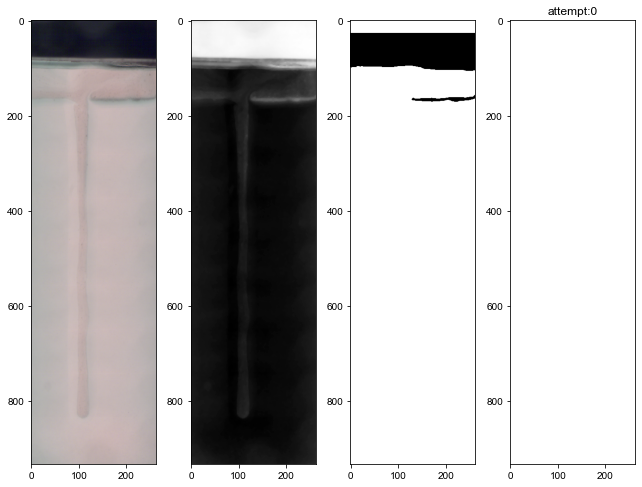

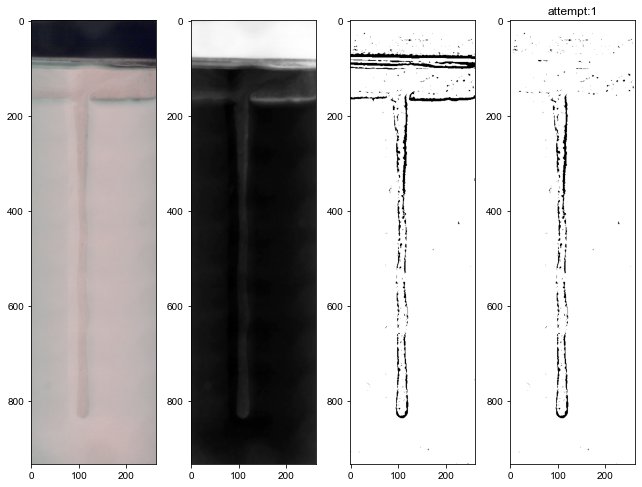

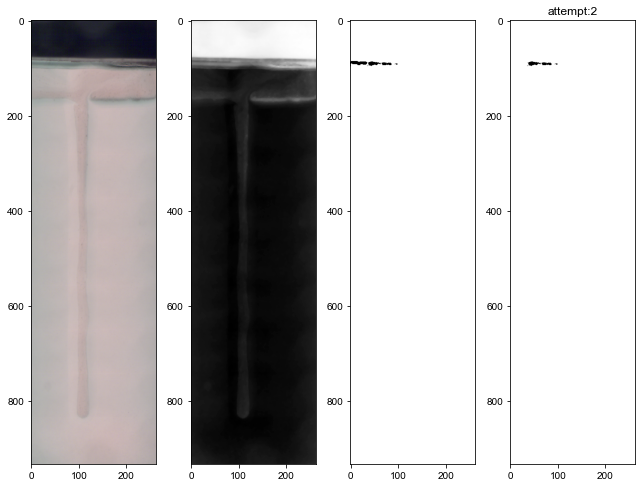

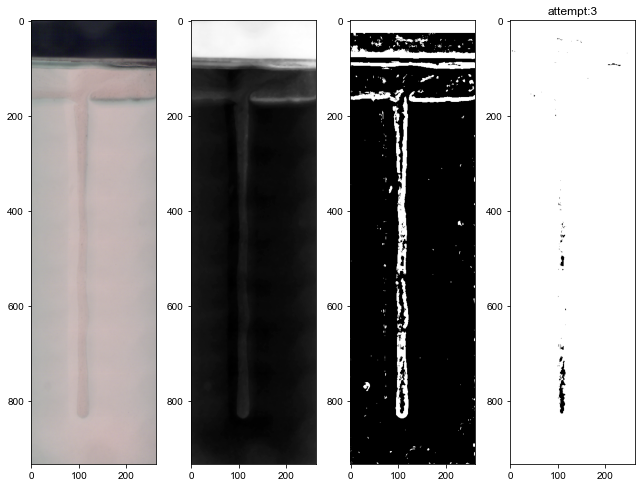

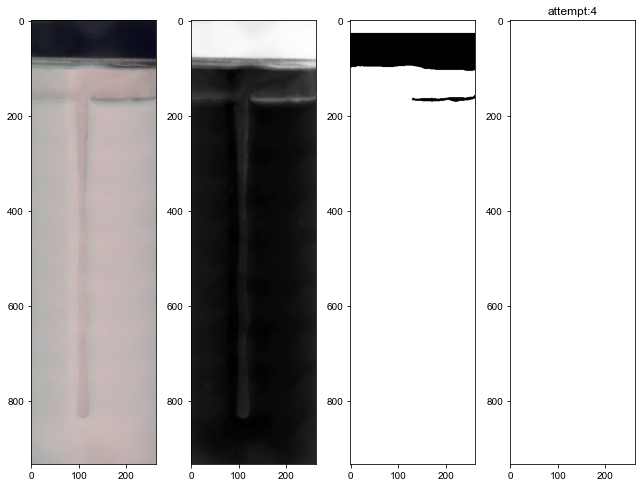

In [17]:
im = me.measure1Line(os.path.join(folder), 'vert', 0, diag=2, critHorizLines=2)

INFO: Measuring I_M6_S_3.00_VI_5_VS_7.5_210824
INFO: ylocs: [223.78436342366933, 480.1340206185567, 749.3131313131313]


,line,segments,maxlen,totlen,maxarea,totarea,roughness,meanT,stdevT,minmaxT,vest
0,0,2,636.67,990.00,56988.89,92500.00,3.49e-03,89.51,0.12,0.41,6.04e+06
1,1,3,336.67,876.67,37722.22,90966.67,3.05e-04,112.05,0.18,0.57,8.28e+06
2,2,1,1470.00,1470.00,111100.00,111100.00,1.38e-03,75.58,0.09,0.35,6.48e+06


INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels mineral LapRD\I_M6_S_3.00\I_M6_S_3.00_VI_5_VS_7.5_210824\I_M6_S_3.00_VI_5_VS_7.5_210824_horizSummary.csv


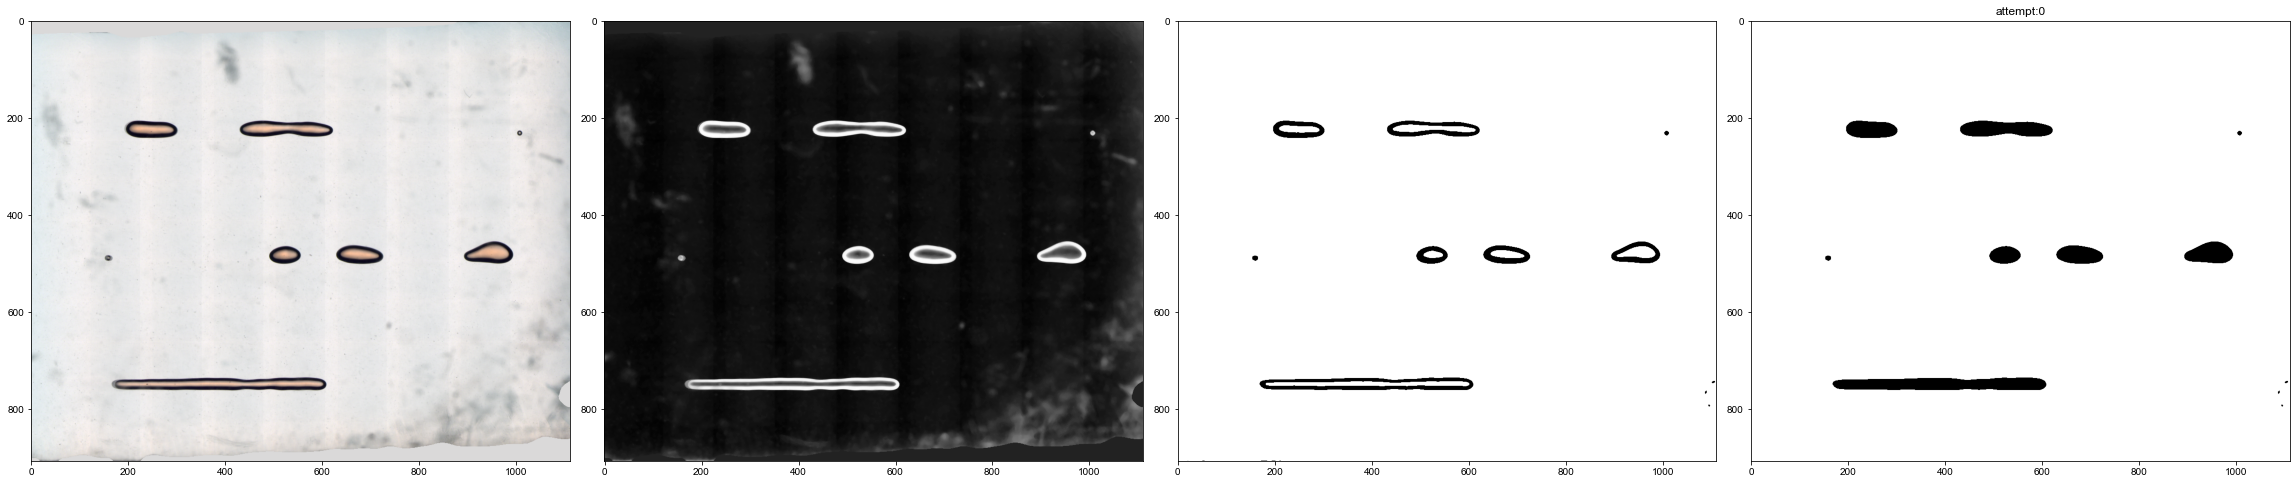

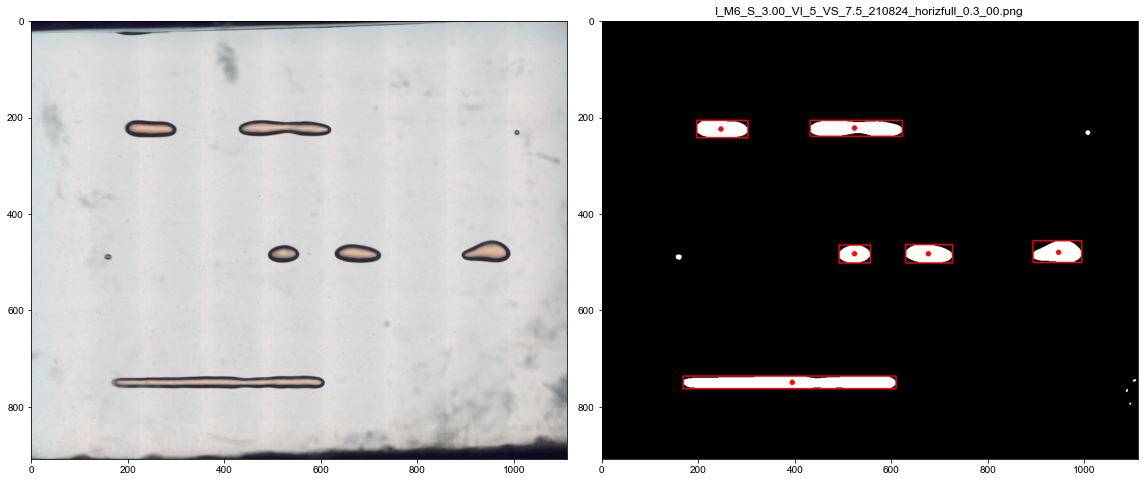

In [101]:
me.measureStills(folder, overwrite=True, overwriteList=['horiz'], diag=2, critHorizLines=2, acrit=200, satelliteCrit=0.01)

In [72]:
me.copyImage(folder, 'horiz', 0)

INFO: Created new file //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_3.50_S_2.50\I_3.50_S_2.50_VI_40_VS_40_210929\I_3.50_S_2.50_VI_40_VS_40_210929_horizfull_0.3_01.png


In [73]:
me.openImageInPaint(folder, 'horiz', 0)